<a href="https://colab.research.google.com/github/changyong93/TIL/blob/main/1.%20python/210711_Tensorflow_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_2%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 구현

## 자동 미분을 이용한 선형 회귀 구현

### 자동 미분

In [ ]:
import tensorflow as tf

tape_gradient()는 자동 미분 기능을 수행. 임의로 2w^2+5라는 식을 세워보고 w에 대해 미분

In [ ]:
w = tf.Variable(2.)
# tensorflow type으로 변수 선언
# tensor(텐서)를 메모리에 저장하는 변수

def f(w):
    y = w**2
    z = 2*y + 5
    return z

이제 gradients를 출력하면 w에 대한 미분한 값이 저장된 것을 확인할 수 있음

In [ ]:
# tf.GradientTape는 컨텍스트(context) 안에서 실행된 모든 연산을 테이프(tape)에 "기록"
# https://www.tensorflow.org/guide/autodiff?hl=ko

with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
# z를 w에 대해 미분을 하는데, 이때 w가 2일 때의 미분 값을 출력
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 선형 회귀 구현하기

In [ ]:
# 선형 회귀 모델(Wx+b)를 위한 tf.Variable을 선언합니다
W = tf.Variable(tf.random.normal(shape = [1])) #랜덤으로 초기값 지정
b = tf.Variable(tf.random.normal(shape = [1])) #랜덤으로 초기값 지정
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.091866], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.16852678], dtype=float32)>


#### 가설 정의
---
@tf.function을 추가하면 파이썬 코드가 동일한 텐서플로우 코드로 변경되며, 이렇게 하면 성능을 최적화 할 수 있음  
모든 파이썬 함수에 tf.funciton 데코레이터를 적용 할 필요는 없음.   
모델 훈련의 한 단계(step)나 정방향 연산(forward pass) 같은 고수준 연산에만 tf.function 데코레이터를 적용

---
데코레이션
- http://solarisailab.com/archives/2351 : 텐서플로우 기초 그래프 생성과 실행 설명
- https://www.tensorflow.org/guide/function?hl=ko : (정식 문서)
- https://www.inflearn.com/questions/174459 : tf.functions 역할 설명(인프런)

In [ ]:
#여기서 정방향연산은 입력을 넣었을 때 결과를 출력하는 아래 linear_model 함수
@tf.function
def linear_model(x):
    return W*x + b

#### 손실 함수 정의

In [ ]:
#손실 함수를 정의
#MSE 손실함수 사용(mean(y - yy)^2)
@tf.function
def mse_loss(y_pred,y): #제곱한 값이므로, y와 y' 위치가 바뀌어도 상관없음
    return tf.reduce_mean(tf.square(y_pred - y)) #tf.reduce_mean = 평균을 출력해주는 메소드

#### 옵티마이저 정의(경사 하강법)

파라미터를 업데이트 하는 한 순간을 step이라고 할 때, 그 한 순간을  정의한 함수를 train_step이라는 이름의 함수로 작성   
아래 내용은 이해가 안되면 일단 처음에는 암기를 해도 무방할 만큼, TF2.0에서는 당연하게 사용되는 패턴   
앞으로의 강의에서는 이보다도 더 쉬운 keras 패턴을 사용할 예정

In [ ]:
# 최적화를 위한 그라디언트 디센트 옵티마이저 정의
# 사용자가 정한 learning rate 값을 sgd()에 작성
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# 첫 번째 인자인 x는 입력 데이터
# 두 번째 인자인 y는 레이블
@tf.function
def train_step(x,y):
  with tf.GradientTape() as tape:
    #현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = linear_model(x)
    
    #MSE 계산
    loss = mse_loss(y_pred,y)

  #손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(loss,[W,b]) #loss를 W와 b에 대해서 미분

  #파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W,b])) #미분한 값을 기준으로 W,b를 업데이트

In [ ]:
# 트레이닝을 위한 입력값과 출력값 준비
x_train = [1,2,3,4]
y_train = [2,4,6,8]

# 경사하강법을 1000번 수행
for i in range(1000):
  if (i+1) % 100 == 0:
    print(i+1, "회 학습")
  train_step(x_train,y_train)

# 테스트를 위한 입력값을 준비
x_test = [3.5, 5, 5.5, 6]
# 테스트 데이터를 이요해 학습된 선형회귀 모델이 데이터의 경향성(y = 2x)을 잘 학습했는지 측정

# 예상되는 참값 : [7, 10, 11, 12]
# print(linear_model(x_test))
print(linear_model(x_test).numpy())

100 회 학습
200 회 학습
300 회 학습
400 회 학습
500 회 학습
600 회 학습
700 회 학습
800 회 학습
900 회 학습
1000 회 학습
[ 6.9896154  9.961792  10.9525175 11.943244 ]


## 케라스를 이용한 선형 회귀 구현

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

keras 모델을 만드는 방법은 sequential 방법과 functional API 방법이 있다(https://leestation.tistory.com/777, https://subinium.github.io/Keras-7/)
- Sequential : 층층이(layer-by-layer) 쌓아 올릴 수 있게 하는 방법
  - 대부분의 문제를 해결할 수 있지만, layer를 공유하는 구조나, 다중 입력/출력을 사용하지 못하는 문제가 있다
- functional API : layer가 앞/뒤 layer에만 연결된 구조뿐 아니라 훨씬 더 자유자재로 그 구조를 정의하여 사용 가능
  - layer들을 어떤 layer에든지 연결하여 사용 가능
---
- 첫 번째 인자인 1은 출력 차원을 정의
- 두 번째 인자인 input_dim은 입력 차원을 정의
- 이번 실습과 같이 1개의 실수 x를 가지고 하는 1개의 실수 y를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가짐

In [ ]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

#방식 1)
model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
#1-1)
model.add(Dense(units = 1, input_dim = 1, activation = 'linear'))
#1-2)
# model.add(Dense(units = 1, input_shape = (1,), activation = 'linear'))

#방식 2)
# model = Sequential(
#     [
#      Dense(units = 1, input_dim = 1,activation = 'linear')
#     ]
# )

# sgd는 경하 하강법을 의미. 학습률(learning rate,lr)은 0.01
sgd = optimizers.SGD(lr=0.01)


# 손실 함수(Loss function)은 평균제곱오차 mse를 사용
model.compile(optimizer = sgd, loss = 'mse', metrics = ['mse'])

model.fit(X,y, batch_size = 1, epochs = 300, shuffle = False)
#shuffle은 batch_size 단위로 섞음
#shuffle을 안할 시 입력 데이터 순서까지 학습할 수 있음
#일반적으로 데이터 순서가 무의미 하기에 셔플을 적용하지만 수업에선 셔플 옵션이 있다는 것을 보여주기 위해 False를 함

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
9/9 [==============================] - 0s 2ms/step - loss: 308.0792 - mse: 308.0792
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1537 - mse: 2.1537
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1534 - mse: 2.1534
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1532 - mse: 2.1532
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1530 - mse: 2.1530
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1527 - mse: 2.1527
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 2.1525 - mse: 2.1525
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1523 - mse: 2.1523
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1521 - mse: 2.1521
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1519 - mse: 2.1519
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1

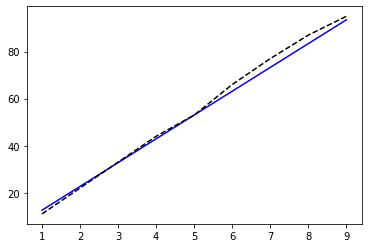

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,model.predict(X),'b',X,y,'k--')

# 2강 수업 내용

## Bag of Words
---
단어의 순서는 고려하지 않고, 단어의 출현 빈도(frequency)에만 집중하는 텍스트 데이터 수치화 표현

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 450kB 56.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### 직접 구현

In [ ]:
from konlpy.tag import Okt
import re
okt = Okt()

sentence = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."

#정규표현식을 통해 온점 제거
token = re.sub("(\.)","",sentence)

#Okt 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에 token 변수에 값 할당
token = okt.morphs(token)

word2idx = {}
bow = []
for voca in token:
    if voca not in word2idx.keys():
        # token을 읽으면서, word2idx에 없는 단어는 새로 추가하고, 있으면 넘기고, bow에는 기본값 1개를 추가(단어 개수가 1개 이상이기 때문)
        word2idx[voca] = len(word2idx)
        bow.append(1)
        # bow.insert(len(word2idx)-1,1) #강사님의 경우 이렇게 작성하셨지만, 단어가 없는 경우 순서대로 입력되기에 굳이 idx 위치를 맞춰줄 필요는 없어보임 
    else:
        idx = word2idx[voca]
        # idx = word2idx.get(voca) # dict 데이터로 부터 특정 단어에 대한 idx 번호를 가져와야 하는데, get을 써도 되고, 아니면 indexing으로 찾아도 무방함
        bow[idx] += 1
        # 재등장한 단어는 해당하는 인덱스 위치에 +1을 추가(단어의 개수 세는 것)
print(word2idx)
print(bow)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


### CounterVectorizer 사용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
corpus = ['you know I want your love. because I love you.']
print(vector.fit_transform(corpus).toarray()) #코퍼스로부터 각 단어의 빈도수 기록
print(vector.vocabulary_) #단어별 인덱스가 어떻게 부여되어있는지 보여줌

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


### TF-IDF 행렬 만들기

In [ ]:
import pandas as pd #데이터프레임 사용
from math import log #idf 계산

In [ ]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [ ]:
N = len(docs) #총 문서 수

def tf(t,d): #t(word), d(document)
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc #t, 즉 단어가 문서에 있으면 True(1) 아니면 False(0)
  return log(N / (df + 1))

def tfidf(t,d):
  return tf(t,d) * idf(t)

In [ ]:
result = []
for doc in docs: # 각 문서에 대해 아래 명령을 수행
    result.append([tf(v,doc) for v in vocab])
tf_ = pd.DataFrame(result,columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [ ]:
result = [idf(t) for t in vocab]
idf_ = pd.DataFrame(result, index = vocab, columns = ['idf'])
idf_

,idf
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [ ]:
result = []
for doc in docs:
  result.append([tfidf(t,doc) for t in vocab])
tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


- 지금까지 IF-IDF의 가장 기본적인 식에 대해서 학습 및 실제 구현
- 하지만 실제 TF-IDF 구현을 제공하는 많은 패키지들은 패키지마다 상위 기본적인 식을 기준으로 조금씩 다르게 구현
- 만약 문서수가 4인데 df가 3인 경우 idf값이 0으로 출력되는 문제가 발생함, 이런 문제를 해결하기 위해 idf 값에 +1을 한 경우도 있는데 사이킷런도 이런 방식을 사용

### Tensorflow로 Bag of Words 구현

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']
t = Tokenizer()
t.fit_on_texts(texts)
print(t.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


- 각 단어에 숫자 1부터 시작하는 정수 인덱스 부여
- text데이터를 matrix로 출력하는 texts_to_matrix()를 활용(총 4가지 모드)
  - binary, count, freq, tfidf

In [ ]:
print(t.texts_to_matrix(texts,mode = 'count'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


count 모드   
- 각 문서별 단어 빈도 수
- 주의할 점은, 단어의 index는 1번부터 부여되며 0번 인덱스는 그 어떤 단어도 할당되어 있지 않음
- 따라서 실제 단어가 9개라도 열의 개수는 10개인 것을 주의 해야 함
- DTM

In [ ]:
print(t.texts_to_matrix(texts,mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


binary 모드
- count 모드와 유사하지만 각 문서별 특정 단어가 있으면 1 아니면 0으로 값을 반환

In [ ]:
print(t.texts_to_matrix(texts,mode = 'freq').round(3))

[[0.    0.    0.333 0.333 0.333 0.    0.    0.    0.    0.   ]
 [0.    0.333 0.333 0.333 0.    0.    0.    0.    0.    0.   ]
 [0.    0.5   0.    0.    0.    0.25  0.25  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.333 0.333 0.333]]


freq 모드
- 각 문서별 전체 단어 개수에서 특정 단어 개수를 나눠서 값을 반환
- ex) 길고 노란 바나나 바나나 => 바나나의 값은 2 / 4, 길고와 노란의 값은 1/4

In [ ]:
print(t.texts_to_matrix(texts,mode = 'tfidf').round(3))

[[0.    0.    0.847 0.847 1.099 0.    0.    0.    0.    0.   ]
 [0.    0.847 0.847 0.847 0.    0.    0.    0.    0.    0.   ]
 [0.    1.435 0.    0.    0.    1.099 1.099 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.099 1.099 1.099]]


tfidf 모드
- 직접 구현 및 sklearn의 tfidf와 조금 다른 방식
- idf 계산 시 idf = log((N / (df+1)) + 1)로 log 내에 1을 더해줌
- 조금씩 구현 방식은 다르지만 기본은 동일하므로 필요한 조건에 맞춰서 사용하면 됌

## Tensorflow 기초(Keras)

### import 시 패키지 네이밍

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

### 딥러닝 실행 순서

1. 전처리 : 학습에 필요한 데이터 전처리 수행   
2. 모델링(model) : 모델을 정의   
3. 컴파일(compile) : 모델 생성   
4. 학습(fit) : 모델 학습   

아래는 실세 전처리 - 모델링 - 컴파일 - 학습으로 이어지는 코드

In [ ]:
import tensorflow as tf
tf.keras.layers.Dense(units = 10)

In [ ]:
from tensorflow.keras.layers import Dense
Dense(units = 10)

In [3]:
# 필요한 패키지 import
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# 데이터 전처리
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0], dtype=float)

# 모델 정의(modeling)
model = Sequential()

# Dense의 첫번째 인자는 항상 출력의 차원을 의미
model.add(Dense(units = 1,activation = 'linear',input_shape = (1,)))
# model.add(Dense(units = 1,activation = 'linear',input_dim = 1))

# 모델 생성(compile)
model.compile(optimizer = 'sgd',loss = 'mse')

# 학습(fit)
model.fit(xs,ys,epochs = 1200, verbose = 0)

# 검증
# 16.000046
model.predict([10.0])

array([[16.000046]], dtype=float32)

tensorflow 2.0은 keras의 sequential 방식과 동일하게 블록쌓기 방식으로 매우 쉽게 모델링이 가능   
Dense Layer는 가장 기본적인 신경망층   
Dense == fully Connected layer

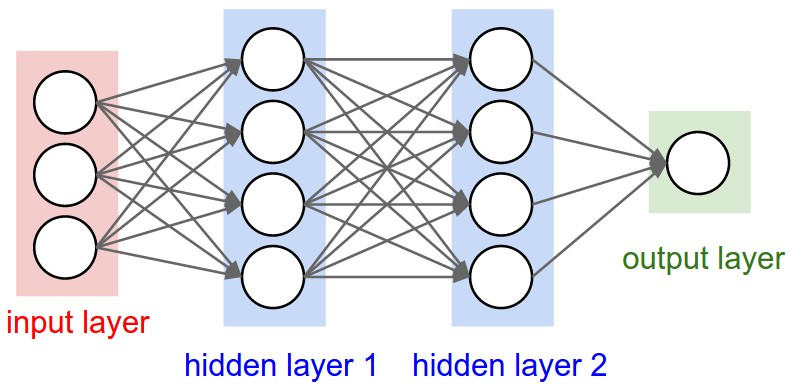

In [4]:
from IPython.display import Image

Image('https://cs231n.github.io/assets/nn1/neural_net2.jpeg')

In [5]:
model = Sequential([
                    Dense(1)
])

### 적절한 optimizer와 loss 선정
---
- 모델별로 적절한 optimizer와 loss 선정이 필요
- regression(회귀) 예측을 위해서는 loss = mse를 선택
- optimizer는 여러가지를 활용할 수 있지만, 단순 회귀에선 sgd가 적당

### compile
---
- 선택한 optimizer와 loss를 지정해주고 컴파일 진행

In [6]:
model.compile(optimizer = 'sgd', loss = 'mse')

### fit
---
- fit 메소드를 이용하여 모델 학습 진행
- 학습 시 feature, label 값 지정, 그리고 epochs 지정

In [8]:
model.fit(xs,ys, epochs = 1200, verbose = 0)

### Predict
---
잘 학습되었는지 검증

In [9]:
# output
# 16.000046
model.predict([10.0])

array([[16.000046]], dtype=float32)

## 선형 회귀 구현(Keras)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy as np

In [11]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [12]:
model = Sequential()
model.add(Dense(units = 1, activation = 'linear'))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'mse', metrics = ['mse'])
model.fit(X,y,epochs = 300, shuffle=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
1/1 [==============================] - 0s 302ms/step - loss: 2940.3147 - mse: 2940.3147
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 362.7996 - mse: 362.7996
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 45.6551 - mse: 45.6551
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 6.6321 - mse: 6.6321
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 1.8300 - mse: 1.8300
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 1.2384 - mse: 1.2384
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1649 - mse: 1.1649
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1552 - mse: 1.1552
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1533 - mse: 1.1533
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1524 - mse: 1.1524
Epoch 11/300
1/1 [==============================] - 0s 5ms/step -

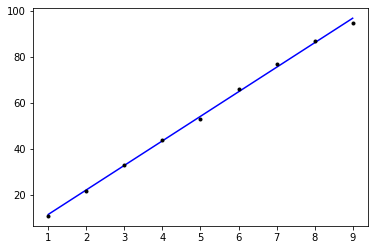

In [16]:
import matplotlib.pyplot as plt
plt.plot(X,model.predict(X),'b',X,y,'k.')

## 선형 회귀 구현(Tage 버전)

### 자동 미분 설명

In [23]:
import tensorflow as tf

자동 미분을 수행하는 tape_gradient() 메소드 활용   
이해를 위해 우선 2w^2 + 5라는 식을 세워보고, w에 대해 미분

In [24]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  return 2*y+5

In [25]:
with tf.GradientTape() as tape:
  z = f(w)
gradients = tape.gradient(z,[w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


- with wf.GradientTape()을 할 경우, 해당 with문이 내에서 수행 시 모든 연산을 기록
- tape.gradient(z,[w])는 연산 기록을 토대로 z를 w에 대해 미분


### Tape로 선형회귀 구현

In [124]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [125]:
# 훈련 가중치 선언
W = tf.Variable(tf.random.normal(shape = [1]))
b = tf.Variable(tf.random.normal(shape = [1]))
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.09368575], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.36977583], dtype=float32)>


In [126]:
@tf.function
def hypothesis(x):
  return W*x + b

In [127]:
# 테스트를 위한 입력값을 준비합니다.
x_test = [3.5, 5, 5.5, 6]
# 테스트 데이터를 이용해 학습된 선형회귀 모델이 데이터의 경향성(y=10.6x)을 잘 학습했는지 측정합니다.
print(hypothesis(x_test).numpy())

[-0.04187569  0.09865293  0.14549583  0.1923387 ]


In [128]:
#손실함수 정의
#MSE_loss mean((y-y')^2)
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred-y))

In [129]:
optimizer = tf.optimizers.SGD(learning_rate = 0.01)
for i in range(1000):
  with tf.GradientTape() as tape:
    y_pred = hypothesis(X)
    cost = mse_loss(y_pred,y)
  gradients = tape.gradient(cost,[W,b])
  optimizer.apply_gradients(zip(gradients,[W,b]))
  if (i+1)%100 == 0:
    print(f"epoch : {i+1} | W의 값 : {(W.numpy())} | b의 값 : {b.numpy()} | cost : {cost}")

epoch : 100 | W의 값 : [10.631195] | b의 값 : [1.1336235] | cost : 1.0827279090881348
epoch : 200 | W의 값 : [10.648787] | b의 값 : [1.0229318] | cost : 1.0699070692062378
epoch : 300 | W의 값 : [10.660443] | b의 값 : [0.9495881] | cost : 1.0642788410186768
epoch : 400 | W의 값 : [10.668166] | b의 값 : [0.9009906] | cost : 1.061813235282898
epoch : 500 | W의 값 : [10.673284] | b의 값 : [0.8687906] | cost : 1.0607234239578247
epoch : 600 | W의 값 : [10.676675] | b의 값 : [0.84745514] | cost : 1.0602529048919678
epoch : 700 | W의 값 : [10.678921] | b의 값 : [0.83331794] | cost : 1.0600378513336182
epoch : 800 | W의 값 : [10.680409] | b의 값 : [0.82395107] | cost : 1.0599466562271118
epoch : 900 | W의 값 : [10.6813965] | b의 값 : [0.8177441] | cost : 1.0599093437194824
epoch : 1000 | W의 값 : [10.68205] | b의 값 : [0.81363225] | cost : 1.0598901510238647


In [130]:
# 테스트를 위한 입력값을 준비합니다.
x_test = [3.5, 5, 5.5, 6, 9.5]
# 테스트 데이터를 이용해 학습된 선형회귀 모델이 데이터의 경향성(y=10.6x)을 잘 학습했는지 측정합니다.

print(hypothesis(x_test).numpy())

[ 38.200806  54.22388   59.564907  64.90593  102.2931  ]


## 로지스틱 회귀 구현

In [132]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# X의 입력이 10부터 y의 출력이 1이 되도록 설계된 데이터
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(units = 1, activation = 'sigmoid'))
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer = sgd, loss = 'binary_crossentropy',metrics = ['binary_crossentropy'])
model.fit(X,y,epochs = 200, shuffle = False)

Epoch 1/200
1/1 [==============================] - 0s 342ms/step - loss: 36.6157 - binary_crossentropy: 36.6157
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 31.1114 - binary_crossentropy: 31.1114
Epoch 3/200
1/1 [==============================] - 0s 8ms/step - loss: 25.6075 - binary_crossentropy: 25.6075
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 20.1052 - binary_crossentropy: 20.1052
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 14.6081 - binary_crossentropy: 14.6081
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 9.1291 - binary_crossentropy: 9.1291
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 3.7294 - binary_crossentropy: 3.7294
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2790 - binary_crossentropy: 0.2790
Epoch 9/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2497 - binary_crossentropy: 0.2497
Epoch 10/200
1/

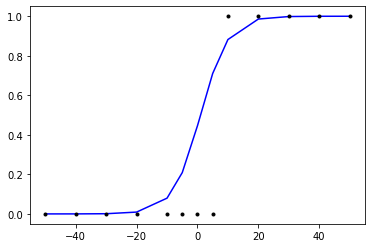

In [133]:
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

## 다중 선형 회귀 구현

In [138]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [140]:
# 입력 벡터의 차원은 3입니다. 즉, input_dim은 3입니다.
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 가산점
# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y = np.array([73,82,72,57,34]) # 최종 성적

model = Sequential()
model.add(Dense(units = 1, input_shape = (3,), activation = 'linear'))
optimizer = optimizers.SGD(learning_rate=0.00001)
model.compile(optimizer = optimizer, loss = ['mse'], metrics = ['mse'])
model.fit(X,y,epochs = 500, batch_size = 1, shuffle = False)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 2577.8972 - mse: 2577.8972
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 456.0607 - mse: 456.0607
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 189.3710 - mse: 189.3710
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 150.8535 - mse: 150.8535
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 134.9400 - mse: 134.9400
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 120.6479 - mse: 120.6479
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 107.5127 - mse: 107.5127
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 96.0818 - mse: 96.0818
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 86.4300 - mse: 86.4300
Epoch 10/500
5/5 [==============================] - 0s 4ms/step - loss: 78.3879 - mse: 78.3879
Epoch 11/500
5/5 [=========================

In [146]:
print(model.predict(X))
print(y)

[[76.89315 ]
 [82.31366 ]
 [69.53466 ]
 [57.90113 ]
 [31.367434]]
[73 82 72 57 34]


In [148]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [152]:
# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y = np.array([0, 1, 1, 1])

model = Sequential([
                    Dense(units = 1, input_shape = (2,), activation = 'sigmoid')
])
model.compile(optimizer='sgd',loss = 'binary_crossentropy', metrics = ['binary_crossentropy'])
model.fit(X,y,epochs = 800, batch_size = 1, shuffle = False)

Epoch 1/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5290 - binary_crossentropy: 0.5290
Epoch 2/800
4/4 [==============================] - 0s 3ms/step - loss: 0.5255 - binary_crossentropy: 0.5255
Epoch 3/800
4/4 [==============================] - 0s 3ms/step - loss: 0.5220 - binary_crossentropy: 0.5220
Epoch 4/800
4/4 [==============================] - 0s 3ms/step - loss: 0.5186 - binary_crossentropy: 0.5186
Epoch 5/800
4/4 [==============================] - 0s 3ms/step - loss: 0.5153 - binary_crossentropy: 0.5153
Epoch 6/800
4/4 [==============================] - 0s 4ms/step - loss: 0.5121 - binary_crossentropy: 0.5121
Epoch 7/800
4/4 [==============================] - 0s 4ms/step - loss: 0.5090 - binary_crossentropy: 0.5090
Epoch 8/800
4/4 [==============================] - 0s 4ms/step - loss: 0.5060 - binary_crossentropy: 0.5060
Epoch 9/800
4/4 [==============================] - 0s 4ms/step - loss: 0.5030 - binary_crossentropy: 0.5030
Epoch 10/800
4/4 [==========

  ## 소프트맥스 회귀 구현(Keras)

In [159]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [160]:
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [180]:
x_data = np.array(df.data, dtype = np.float32)
y_data = np.array(df.target, dtype = np.int32)
nb_features = x_data.shape[1]
nb_classes = len(set(y_data))
print(x_data.shape,y_data.shape,nb_features, nb_classes)

(150, 4) (150,) 4 3


In [183]:
# one-hot encoding
y_one_hot = tf.one_hot(indices=list(y_data), depth = nb_classes)

In [184]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model = Sequential()

# 입력의 차원은 4, 출력의 차원은 3, activation function은 softmax
model.add(Dense(3, input_dim=4, activation='softmax'))

# 학습률(learning rate, lr)은 0.01로 합니다.
sgd = optimizers.SGD(lr=0.01)

# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
history = model.fit(x_data, y_one_hot, batch_size=1, epochs=200)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
150/150 [==============================] - 0s 1ms/step - loss: 1.1259 - accuracy: 0.6667
Epoch 2/200
150/150 [==============================] - 0s 993us/step - loss: 0.9011 - accuracy: 0.5133
Epoch 3/200
150/150 [==============================] - 0s 1ms/step - loss: 0.8418 - accuracy: 0.4600
Epoch 4/200
150/150 [==============================] - 0s 1ms/step - loss: 0.8040 - accuracy: 0.5000
Epoch 5/200
150/150 [==============================] - 0s 954us/step - loss: 0.7654 - accuracy: 0.5600
Epoch 6/200
150/150 [==============================] - 0s 1ms/step - loss: 0.7313 - accuracy: 0.5400
Epoch 7/200
150/150 [==============================] - 0s 968us/step - loss: 0.7069 - accuracy: 0.5333
Epoch 8/200
150/150 [==============================] - 0s 1000us/step - loss: 0.6835 - accuracy: 0.5400
Epoch 9/200
150/150 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.5600
Epoch 10/200
150/150 [==============================] - 0s 972us/step - loss: 0.64

## 소프트맥스 회귀 구현(Tape)

In [243]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [244]:
df = load_iris()
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [245]:
x_data = np.array(df.data, dtype = np.float32)
y_data = np.array(df.target, dtype = np.int32)

nb_features = x_data.shape[1]
nb_classes = len(set(y_data))
print(x_data.shape,y_data.shape,nb_features,nb_classes)
y_ont_hot = tf.one_hot(indices = list(y_data), depth = nb_classes)

(150, 4) (150,) 4 3


In [248]:
tf.random.set_seed(2021)
W = tf.Variable(tf.random.normal(shape = [nb_features, nb_classes]))
b = tf.Variable(tf.random.normal(shape = [nb_classes]))
print(W.numpy())
print(b.numpy())

[[ 1.0473857  -0.12665796  0.5701126 ]
 [-1.2995517   0.68507546 -0.6931981 ]
 [-0.14386335  0.86525923  1.4287399 ]
 [-0.8128876  -0.05127564 -0.14279948]]
[-0.5503563  1.0144334 -0.9311876]


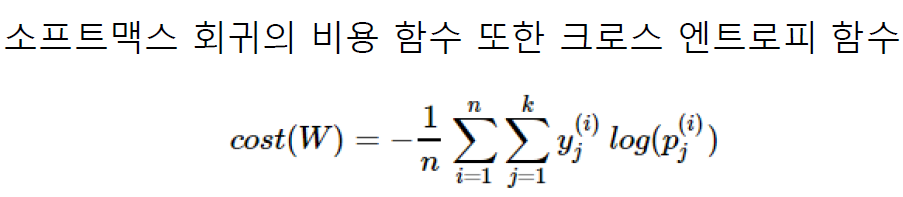

In [247]:
#learning_rate
learning_rate = 0.01

#softmax function
@tf.function
def softmax(x):
  # 3차원 텐서 사이에서 행렬 곱(tf.matmul)
  return tf.nn.softmax(tf.matmul(x_data,W) + b)

# for Training
for i in range(10000):
  with tf.GradientTape() as tape:
    #입력된 X별로 세 개의 class에 대한 예측값 계산
    sm = softmax(x_data)
    
    #예측값에 로그를 취한 후 실제 y값과 곱하는데, 이 과정을 모든 예측값과 관측치에 적용
    #그 후 값을 평균을 취해주고 -를 곱하여 비용 계산
    cost = -tf.reduce_mean(tf.reduce_sum(y_one_hot*tf.math.log(sm),axis = 1))

  #아래 코드가 with의 절에 있든, 그 밖에 있든 결과상 차이 없음
  
  W_grad,b_grad = tape.gradient(cost,[W,b])
  #tape.gradient()로도 gradient를 계산할 수 있지만, compute_gradients도 가능
  #동일한 역할을 수행하나, tape에 저장된 연산 결과를 토대로 특정 weights를 업데이트 시 tape.gradient를 쓰고
  #tape를 미사용 시 직접 gradient를 계산할 경우 compute_gradients를 사용함
  
  #또한 optimizer.apply_gradients로도 weight를 업데이트할 수 있지만
  #optimizer를 쓰지 않는 경우 직집적으로 learning_rate를 곱하여 Weight 및 bias를 계산해줌
  #아래 assign_sub를 하면 W에 ()안의 값만큼 weight를 변환함
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)
  if (i+1) % 1000 == 0:
        print(">>> #%s \n Weights: \n%s \n Bias: \n%s \n cost: %s\n" % (i+1, W.numpy(), b.numpy(), cost.numpy()))

>>> #1000 
 Weights: 
[[ 1.6149405  -0.08084445 -0.04325487]
 [-0.34560114  0.04531072 -1.0073849 ]
 [-0.9433694   1.1390452   1.9544592 ]
 [-1.1922408  -0.23309867  0.41837618]] 
 Bias: 
[-0.35298625  1.0165349  -1.130658  ] 
 cost: 0.34616858

>>> #2000 
 Weights: 
[[ 1.7114769   0.12960836 -0.35024437]
 [-0.05019419 -0.08555552 -1.1719257 ]
 [-1.299022    1.0721405   2.3770175 ]
 [-1.3511709  -0.48280838  0.8270172 ]] 
 Bias: 
[-0.2996098  1.0910336 -1.2585324] 
 cost: 0.25822216

>>> #3000 
 Weights: 
[[ 1.7842565   0.27599204 -0.56940854]
 [ 0.15832108 -0.15490103 -1.3110955 ]
 [-1.546414    1.0098495   2.6867008 ]
 [-1.4635335  -0.6700696   1.1266425 ]] 
 Bias: 
[-0.26111662  1.1551049  -1.3610975 ] 
 cost: 0.21221003

>>> #4000 
 Weights: 
[[ 1.8430264   0.38329026 -0.7354771 ]
 [ 0.3211854  -0.19609612 -1.4327643 ]
 [-1.7393829   0.95986444  2.9296522 ]
 [-1.5522476  -0.8166467   1.3619335 ]] 
 Bias: 
[-0.23062427  1.2114524  -1.4479376 ] 
 cost: 0.18401949

>>> #5000 
 Weights

In [254]:
predicted = tf.argmax(softmax(x_data), axis = 1)
real = tf.argmax(y_one_hot, axis = 1)
def acc(pred,real):
  accuracy = tf.reduce_mean(tf.cast(tf.equal(pred,real), dtype = tf.float32))
  #tf.equal 논리 결과 값 반환 True / False
  #tf.cast 텐서를 새로운 형태로 캐스팅하는데 사
    # 부동소수점형에서 정수형으로 바꾼 경우 소수점 버림
    # Boolean형태인 경우 True이면 1, False이면 0을 출력
  return accuracy

print(f"Accuracy : {acc(predicted,real)}%")

Accuracy : 0.9866666793823242%


## 다층 퍼셉트론으로 MNIST 분류
---
- MNIST 데이터베이스 는 손으로 쓴 숫자들로 이루어진 대형 데이터베이스

In [383]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras import optimizers

In [384]:
mnist = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#x_train, x_test normalize: 값이 0~255 gray값으로 되어 있으며 이 값을 0~1로 표준화
x_train,x_test = x_train/255.0, x_test/255.0

In [385]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [386]:
model = Sequential([
                    Flatten(input_shape = (28,28)), #28x28 이미지 데이터를 펴줌
                    Dense(128, activation = 'relu'), #활성화 함수로 relu 사용
                    Dropout(0.2), #데이터의 20%를 제외한 상태에서 학습 진행
                    Dense(10, activation = 'softmax'), #총 10개의 class(0~9)로 분류
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #분류 모델에서 y값은 one-hot encoding값을 입력해줘야 하지만,
              #integer 그대로 사용하고자 할 경우 sparse_categorical_crossentropy, ont-hot encoding이 되어 있으면 categorical_crossentropy
              metrics=['accuracy'])

In [387]:
model.fit(x_train,y_train,epochs = 5)
model.evaluate(x_test,y_test,verbose = 1)#2 = one line per epoch.

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2975 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1409 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1075 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0856 - accuracy: 0.9737
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0729 - accuracy: 0.9776


[0.0729101225733757, 0.9775999784469604]

In [390]:
model.evaluate(x_test,y_test,verbose = 2)

313/313 - 0s - loss: 0.0729 - accuracy: 0.9776


[0.0729101225733757, 0.9775999784469604]

In [391]:
model.evaluate(x_test,y_test,verbose = 0)

[0.0729101225733757, 0.9775999784469604]

## 다층 퍼셉트론으로 20개의 뉴스 그룹 분류하기

In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [2]:
newsdata = fetch_20newsgroups(subset = "train")

subset = "all","train","test"

In [3]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


- data : 훈련에 사용할 데이터
- target : 분류 class

In [4]:
print('훈련용 샘플 개수: ', len(newsdata.data))

훈련용 샘플 개수:  11314


In [5]:
import pprint
pp = pprint.PrettyPrinter()
print("총 주제 개수: ", len(set(newsdata.target)))
for i,s in enumerate(newsdata.target_names,start = 1):
  print(f"{i:>2}번 주제: {s}")

총 주제 개수:  20
 1번 주제: alt.atheism
 2번 주제: comp.graphics
 3번 주제: comp.os.ms-windows.misc
 4번 주제: comp.sys.ibm.pc.hardware
 5번 주제: comp.sys.mac.hardware
 6번 주제: comp.windows.x
 7번 주제: misc.forsale
 8번 주제: rec.autos
 9번 주제: rec.motorcycles
10번 주제: rec.sport.baseball
11번 주제: rec.sport.hockey
12번 주제: sci.crypt
13번 주제: sci.electronics
14번 주제: sci.med
15번 주제: sci.space
16번 주제: soc.religion.christian
17번 주제: talk.politics.guns
18번 주제: talk.politics.mideast
19번 주제: talk.politics.misc
20번 주제: talk.religion.misc


In [6]:
#첫 번째 샘플 데이터 확인
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [7]:
#pandas를 이용하여 dataframe 생성
data = pd.DataFrame(newsdata.data, columns = ["email"])
data['target'] = newsdata.target
data.head()

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [8]:
#data 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


In [9]:
# 결측치 확인
print(data.isnull().any())

email     False
target    False
dtype: bool


In [10]:
#중복값 확인
print(f"중복을 제외한 샘플의 수: ", data.email.nunique())
print(f"중복을 제외한 주제의 수: ", data.target.nunique())

중복을 제외한 샘플의 수:  11314
중복을 제외한 주제의 수:  20


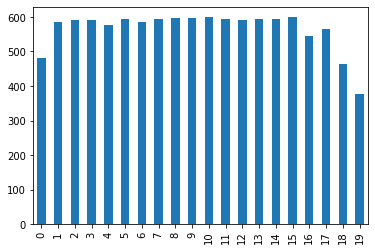

In [11]:
data.target.value_counts().sort_index().plot.bar()

In [12]:
data.groupby('target').size().reset_index(name = 'count')
# data.groupby('target').agg({"email" : "count"}).reset_index()
# data.groupby('target').email.count().reset_index(name = 'count')

,target,count
0,0,480
1,1,584
2,2,591
3,3,590
4,4,578
5,5,593
6,6,585
7,7,594
8,8,598
9,9,597


In [13]:
newsdata_test = fetch_20newsgroups(subset = "test")
train_email = data.email #훈련 데이터 본문
train_label = data.target #훈련 데이터 레이블

test_email = newsdata_test.data #테스트 데이터 본문
test_label = newsdata_test.target #테스트 데이터 레이블

In [14]:
max_words = 10000 #실습에 사용할 단어 개수 지정
num_classes = len(set(train_label)) #20개

In [15]:
def preprocessing_data(train_data, test_data, mode):
  t = Tokenizer(num_words = max_words) 
  t.fit_on_texts(train_data)
  X_train = t.texts_to_matrix(train_data, mode = mode)
  X_test = t.texts_to_matrix(test_data, mode = mode)
  return X_train,X_test,t.index_word

In [22]:
X_train,X_test,index_to_word = preprocessing_data(train_email,test_email,'binary')
y_train = to_categorical(train_label,num_classes = num_classes)
y_test = to_categorical(test_label,num_classes = num_classes)

In [23]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [18]:
print(" 빈도수 상위 1번째 단어: ", index_to_word[1],"\n","빈도수 상위 9999번째 단어: ",index_to_word[9999])

 빈도수 상위 1번째 단어:  the 
 빈도수 상위 9999번째 단어:  mic


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
def fit_and_evaluate(X_train,y_train,X_test,y_test):
  model = Sequential()
  model.add(Dense(units = 256,input_shape = (10000,),activation = "relu"))
  model.add(Dense(units = 128, activation = "relu"))
  model.add(Dense(units = 20, activation = "softmax"))

  model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])
  model.fit(X_train,y_train,epochs = 5, batch_size = 128, verbose = 1, validation_split=0.1)
  score = model.evaluate(X_test,y_test, batch_size = 128, verbose = 0)
  return score

In [27]:
modes = ['binary','count','tfidf','freq']
for mode in modes:
  X_train,X_test,_ = preprocessing_data(train_email,test_email,mode)
  score = fit_and_evaluate(X_train,y_train,X_test,y_test)
  print(mode + "모드의 정확도: ", score[1])

Epoch 1/5
80/80 [==============================] - 4s 44ms/step - loss: 1.2841 - accuracy: 0.7102 - val_loss: 0.4663 - val_accuracy: 0.8710
Epoch 2/5
80/80 [==============================] - 3s 42ms/step - loss: 0.1839 - accuracy: 0.9637 - val_loss: 0.3318 - val_accuracy: 0.9046
Epoch 3/5
80/80 [==============================] - 3s 42ms/step - loss: 0.0580 - accuracy: 0.9950 - val_loss: 0.3015 - val_accuracy: 0.9099
Epoch 4/5
80/80 [==============================] - 3s 42ms/step - loss: 0.0224 - accuracy: 0.9984 - val_loss: 0.3080 - val_accuracy: 0.9064
Epoch 5/5
80/80 [==============================] - 3s 42ms/step - loss: 0.0136 - accuracy: 0.9986 - val_loss: 0.3124 - val_accuracy: 0.9099
binary모드의 정확도:  0.8130642771720886
Epoch 1/5
80/80 [==============================] - 4s 42ms/step - loss: 1.5070 - accuracy: 0.6831 - val_loss: 0.5995 - val_accuracy: 0.8728
Epoch 2/5
80/80 [==============================] - 3s 40ms/step - loss: 0.3186 - accuracy: 0.9402 - val_loss: 0.6038 - val_ac

## 다층 퍼셉트론으로 네이버 영화 리뷰 분류

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 450kB 41.0MB/s 
     |████████████████████████████████| 92kB 10.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import pandas as pd
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f82b51edb10>)

In [3]:
train_data = pd.read_table('ratings_train.txt')

In [4]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
def read_data(filename):
  with open(filename,'r') as f:
    data = [line.split("\t") for line in f.read().splitlines()]
    #txt file의 헤더(id document label) 제외하기
    data = data[1:]
  return data

train_data = read_data("ratings_train.txt")
test_data = read_data("ratings_test.txt")

In [6]:
print("train_data shape: ",(len(train_data),len(train_data[0])))
print("test_data shape: ",(len(test_data),len(test_data[0])))

train_data shape:  (150000, 3)
test_data shape:  (50000, 3)


In [7]:
from konlpy.tag import Okt
okt = Okt()
print(okt.pos('아 더빙.. 진짜 짜증나네요 목소리'))

[('아', 'Exclamation'), ('더빙', 'Noun'), ('..', 'Punctuation'), ('진짜', 'Noun'), ('짜증나네요', 'Adjective'), ('목소리', 'Noun')]


In [9]:
import json
import os
from pprint import pprint
def tokenize(doc):
  #norm : 정규화, stem : 근어
  return ['/'.join(t) for t in okt.pos(doc, norm = True, stem = True)]

if os.path.isfile('train_docs.json'):
  with open('train_docs.json') as f:
    train_docs = json.load(f)
  with open('test_docs.json') as f:
    test_docs = json.load(f)
else:
  train_docs = [[tokenize(row[1]),row[2]] for row in train_data]
  test_docs = [[tokenize(row[1]),row[2]] for row in test_data]
  with open('train_docs.json','w',encoding = 'utf-8') as make_file:
    json.dump('train_docs.json',make_file, ensure_ascii=False, indent = "\t")
  with open('test_docs.json','w',encoding = 'utf-8') as make_file:
    json.dump('test_docs.json',make_file, ensure_ascii=False, indent = "\t")

In [11]:
pprint(train_docs[0])

[['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0']


In [12]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

162


In [31]:
import nltk
text = nltk.Text(tokens, name = "NMSC")
#전체 토큰 개수
print(len(text.tokens))

#중복을 제외한 토큰 개수
print(len(set(text.tokens)))

#출현 빈도가 높은 상위 10개 토큰
print(text.vocab().most_common(10))

162
128
[('../Punctuation', 6), ('영화/Noun', 4), ('./Punctuation', 4), ('연기/Noun', 3), ('없다/Adjective', 3), ('하다/Verb', 3), ('도/Josa', 3), ('이/Josa', 3), ('만/Josa', 3), ('.../Punctuation', 2)]


In [39]:
#상위 10000개 토큰 선택
num_tokens = 10000

selected_words = [t[0] for t in text.vocab().most_common(num_tokens)]

def term_frequency(doc):
  return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d,_ in train_docs]
test_x = [term_frequency(d) for d,_ in test_docs]
train_y = [c for _,c in train_docs]
test_y = [c for _,c in test_docs]

In [42]:
import numpy as np
x_train = np.array(train_x).astype('float32')
x_test = np.array(test_x).astype('float32')

y_train = np.array(train_y).astype('float32')
y_test = np.array(test_y).astype('float32')

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10, 128)
(10, 128)
(10,)
(10,)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10


ValueError: ignored

## functional API로 만든 모델

앞에서 케라스를 사용하여 모델을 설계하는 방식을 sequential API를 사용하였다고 합니다. 그런데 sequential API는 여러층을 공유하거나 다양한 종류의 입력과 출력을 사용하는 등의 복잡한 모델을 만드는 일을 하기에는 한계가 있습니다. 이번에는 복잡한 모델을 생성할 수 있는 방식인 functional API(함수형 API)에 대해서 알아봅니다.

functional API는 각 층을 일종의 함수(function)로서 정의합니다. 그리고 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계합니다. functional API로 FFNN, RNN 등 다양한 모델을 만들면서 기존의 sequential API와의 차이를 이해해봅시다.



### 피드포워드 신경망

In [49]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [52]:
#입력
inputs = Input(shape = (10,))

hidden1 = Dense(64, activation = "relu")(inputs)
hidden2 = Dense(32, activation = "relu")(hidden1)

#출력
output = Dense(1, activation = "sigmoid")(hidden2)

#입력과 출력 정의
model = Model(inputs = inputs, outputs = output)

In [54]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


### 선형 회귀

In [59]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape = (3,))
output = Dense(1, activation = 'linear')(inputs)
linear_model = Model(inputs = inputs, outputs= output)
linear_model.compile(optimizer='adam',loss = 'mse',metrics = ['msc'])
linear_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 로지스틱 회귀

In [61]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

logistic_model.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
logistic_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### 다중 입력을 받는 모델(models that accepts multiple inputs)

In [66]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

# 연결된 값을 입력으로 받는 밀집층을 추가(Dense layer)
z = Dense(2, activation="relu")(result)
# 선형 회귀를 위해 activation=linear를 설정
z = Dense(1, activation="linear")(z)

# 결과적으로 이 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델이 됨.
model = Model(inputs=[x.input, y.input], outputs=z)
model.summary()

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 64)]         0                                            
__________________________________________________________________________________________________
dense_37 (Dense)                (None, 64)           8256        input_16[0][0]                   
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 16)           1040        input_15[0][0]                   
___________________________________________________________________________________________

encoder = Dense(128)(input)  

이와 같은 표현은  

encoder = Dense(128)  
encoder(input)

이 표현과 같습니다.

## soynlp

soynlp는 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기입니다. 비지도 학습으로 형태소 분석을 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 형태소로 분석합니다. soynlp 형태소 분석기는 내부적으로 단어 점수 표로 동작합니다. 이 점수는 응집 확률(cohesion probability)과 브랜칭 엔트로피(branching entropy)를 활용합니다.

In [67]:
!pip install soynlp

     |████████████████████████████████| 419kB 7.7MB/s 


In [68]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7f82890c1a50>)

다운로드 한 말뭉치를 문서 단위로 분리합니다.

In [69]:
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

총 3만 91개의 문서가 존재합니다. 공백이 아닌 문서에 한해 상위 3개의 문서만 

In [70]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

soynlp는 비지도학습 형태소 분석기이므로 기존의 형태소 분석기와는 달리 학습 과정을 거쳐야 합니다. 이는 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정이지요. WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산합니다.

In [75]:
from soynlp.word import WordExtractor
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 2.462 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


## soynlp의 응집 확률(cohesion probability)

응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도입니다. 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱을 한 값입니다. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높습니다. 수식은 아래와 같습니다. 

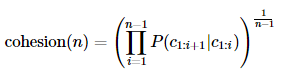

In [76]:
from IPython.display import Image

Image('https://wikidocs.net/images/page/84111/soynlp.png')

아직은 아리송 할 거에요. '반포한강공원에'라는 7의 길이를 가진 문자 시퀀스에 대해서 각 내부 문자열의 스코어를 구하는 과정은 아래와 같습니다.

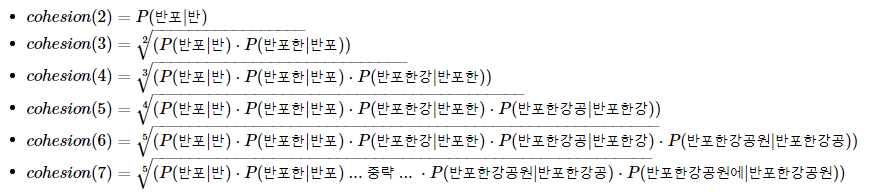

In [77]:
Image('https://wikidocs.net/images/page/84111/soynlp2.png')

실습을 통해 직접 응집 확률을 계산해보겠습니다.

In [80]:
word_score_table["반"].cohesion_forward

0

In [89]:
word_score_table["반포"].cohesion_forward

KeyError: ignored

In [90]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [91]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [92]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [93]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [94]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

## soynlp의 브랜칭 엔트로피(branching entropy)

Branching Entropy는 확률 분포의 엔트로피값을 사용합니다.  이는 주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도입니다. 이해를 위해 퀴즈를 내보겠습니다. 제가 어떤 단어를 생각 중인데, 한 문자씩 말해드릴테니까 매번 다음 문자를 맞추는 것이 퀴즈입니다.

첫번째 문자는 '디'입니다. 다음에 등장할 문자를 맞춰보세요. 솔직히 가늠이 잘 안 가지요? '디'로 시작하는 단어가 얼마나 많은데요. 이걸 어떻게 맞추냐구요. 정답은 '스' 입니다.

이제 '디스'까지 나왔네요. '디스 '다음 문자는 뭘까요? 벌써 정답 단어를 예측한 분도 있을테고, 여전히 가늠이 잘 안가시는 분도 있을 거에요. '디스카운트'라는 단어가 있으니까 '카'일까? 아니면 '디스코드'라는 단어가 있으니까 '코'인가? 생각해보니 '디스코'가 정답일 수도 있겠네요. 그러면 '코'인가? '디스아너드'라는 게임이 있으니까 '아'? 전부 땡땡땡! 이 단어들을 생각하신 분들은 전부 틀렸습니다. 정답은 '플'이었습니다.

'디스플'까지 왔습니다. 다음 문자 맞춰보세요. 이제 좀 명백해지는군요. 이 정도 되면 헷갈리시는 분들은 거의 없을거에요. 정답은 '레'입니다. '디스플레' 다음에는 어떤 문자일까요? 너무 명백해서 문제라고 보기도 어려워졌어요. 정답은 '이'입니다. 제가 생각한 단어는 '디스플레이'였습니다!

저는 지금 브랜칭 엔트로피를 시뮬레이션한 겁니다. 브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도로 비유해봅시다. 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 되면서 점점 줄어듭니다. 실습해볼게요.

In [95]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [96]:
word_score_table["디스플"].right_branching_entropy

-0.0

'디스' 다음에는 다양한 문자가 올 수 있으니까 1.63이라는 값을 가지는 반면, '디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 0이란 값을 가집니다.

In [97]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [98]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

갑자기 값이 급증합니다. 그 이유는 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어와 같은 다양한 경우가 있을 수 있기 때문입니다. 이는 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피 값이 증가하게 됨을 의미합니다. 그리고 이 값으로 단어를 판단하는 것이 가능하겠죠?

## soynlp의 L tokenizer

한국어는 띄어쓰기 단위로 나눈 어절 토큰은 주로 L 토큰 + R 토큰의 형식을 가질 때가 많습니다. 예를 들어서 '공원에'는 '공원 + 에'로 나눌 수 있겠지요. 또는 '공부하는'은 '공부 + 하는'으로 나눌 수도 있을 것입니다. L 토크나이저는 L 토큰 + R 토큰으로 나누되, 분리 기준을 점수가 가장 높은 L 토큰을 찾아내는 원리를 가지고 있습니다.

In [103]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

## 최대 점수 토크나이저

최대 점수 토크나이저는 띄어쓰기가 되지 않는 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저입니다. 띄어쓰기가 되어 있지 않은 문장을 넣어서 점수를 통해 토큰화 된 결과를 보겠습니다.

In [104]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']